# Python Text Analysis: Part 2 Solutions

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
# Use pandas to import tweets
tweets_path = '../data/airline_tweets.csv'
tweets = pd.read_csv(tweets_path, sep=',')

## 🥊 Desafío 1: Aplicar una canalización de limpieza de texto

Escribe una función llamada `preprocess` que realice los siguientes pasos en una entrada de texto:

* Paso 1: Convertir el texto a minúsculas.
* Paso 2: Reemplazar los siguientes patrones con marcadores de posición:
* URLs &rarr; ` URL `
* Dígitos &rarr; ` DIGIT `
* Hashtags &rarr; ` HASHTAG `
* Usuarios de tweets &rarr; ` USER `
* Paso 3: Eliminar los espacios en blanco adicionales.

Aquí tienes algunas sugerencias para guiarte en este desafío:

* Para el Paso 1, recuerda de la Parte 1 que se puede usar un método de cadena llamado [`.lower()`](https://docs.python.org/3.11/library/stdtypes.html#str.lower) para convertir texto a minúsculas.
* Hemos integrado el Paso 2 en una función llamada `placeholder`. Ejecuta la celda a continuación para importarla a tu notebook y podrás usarla como cualquier otra función.
* Para el paso 3, proporcionamos el patrón de expresiones regulares para identificar espacios en blanco, así como el reemplazo correcto para extraer espacios en blanco.

Ejecuta la función `preprocess` en `example_tweet` (tres celdas a continuación) para comprobar si funciona. Si funciona, aplícala a toda la columna `text` del dataframe de tweets.

In [2]:
from utils import placeholder

c:\Users\fmerino\Documents\GitHub\Python-NLP-Fundamentals\solutions\utils.py:4: SyntaxWarning: invalid escape sequence '\d'
  digit_pattern = '\d+'
c:\Users\fmerino\Documents\GitHub\Python-NLP-Fundamentals\solutions\utils.py:14: SyntaxWarning: invalid escape sequence '\d'
  digit_pattern = '\d+'


In [4]:
blankspace_pattern = r'\s+'
blankspace_repl = ' '

def preprocess(text):
    '''Create a preprocess pipeline that cleans the tweet data.'''

    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Replace patterns with placeholders
    text = placeholder(text)

    # Step 3: Remove extra whitespace characters
    text = re.sub(blankspace_pattern, blankspace_repl, text)
    text = text.strip()
    
    return text

In [5]:
example_tweet = 'lol @justinbeiber and @BillGates are like soo 2000 #yesterday #amiright saw it on https://twitter.com #yolo'

In [ ]:
# Apply the function to the example tweet
print(example_tweet)
print(f"{'='*50}")
print(preprocess(example_tweet))

In [ ]:
# Apply the function to the text column and assign the preprocessed tweets to a new column
tweets['text_processed'] = tweets['text'].apply(lambda x: preprocess(x))
tweets['text_processed'].head()

📌 Función preprocess.py

In [ ]:
from utils import placeholder
import re   # 👈 asegúrate de importarlo arriba

blankspace_pattern = r'\s+'
blankspace_repl = ' '

def preprocess(text):
    '''Create a preprocess pipeline that cleans the tweet data.'''

    # Paso 1: Convertir a minúsculas
    text = text.lower()

    # Paso 2: Reemplazar patrones con marcadores de posición
    # - URLs -> URL
    # - Dígitos -> DIGIT
    # - Hashtags -> HASHTAG
    # - Usuarios de Twitter -> USER
    text = placeholder(text)

    # Paso 3: Eliminar espacios en blanco adicionales
    text = re.sub(blankspace_pattern, blankspace_repl, text)
    text = text.strip()
    
    return text


# Prueba
example_tweet = "Check this out! https://huggingface.co #NLP @openai 2025"
print(preprocess(example_tweet))


🔎 Explicación paso a paso

Minúsculas
Normaliza todo el texto (.lower()).
Ej: "HELLO Twitter!!!" → "hello twitter!!!"

Reemplazo con placeholders
La función placeholder(text) (definida en utils.py) busca patrones y los reemplaza:

http://... o https://... → URL

números (123, 2025) → DIGIT

hashtags (#AI) → HASHTAG

usuarios (@elonmusk) → USER

Espacios en blanco extra

re.sub(blankspace_pattern, blankspace_repl, text) convierte cualquier secuencia de espacios/tabulaciones/saltos de línea en un único espacio.

.strip() elimina espacios al inicio o al final.

🧪 Ejemplo de uso

example_tweet = "Check this out! https://huggingface.co #NLP @openai 2025"

print(preprocess(example_tweet))


✅ Salida esperada:

check [this out](https://huggingface.co/) url hashtag user digit

## 🥊 Desafío 2: Segmentar (Lematizar) la entrada de texto

Recuerde que en la Parte 1 introdujimos el uso de `spaCy` para realizar la lematización, es decir, para recuperar la forma base de una palabra. Este proceso reducirá el tamaño del vocabulario al minimizar las variaciones de palabras; un vocabulario más pequeño puede ayudar a mejorar el rendimiento del modelo en la clasificación de sentimientos.

Ahora implementemos la lematización en nuestros datos de tweets y usemos el texto lematizado para crear un tercer DTM.

Complete la función `lemmatize_text`. Requiere una entrada de texto y devuelve los lemas de todos los tokens.

Aquí tienes algunas sugerencias para guiarte en este desafío:

- Paso 1: Inicializa una lista para almacenar lemas
- Paso 2: Aplica la secuencia `nlp` al texto de entrada
- Paso 3: Itera sobre los tokens en el texto procesado y recupera el lema del token
- PISTA: La lematización es una de las anotaciones lingüísticas que la secuencia `nlp` realiza automáticamente. Podemos usar `token.lemma_` para acceder a la anotación.

In [ ]:
# Import spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Create a function to lemmatize text
def lemmatize_text(text):
    '''Lemmatize the text input with spaCy annotations.'''

    # Step 1: Initialize an empty list to hold lemmas
    lemma = []

    # Step 2: Apply the nlp pipeline to input text
    doc = nlp(text)

    # Step 3: Iterate over tokens in the text to get the token lemma
    for token in doc:
        lemma.append(token.lemma_)

    # Step 4: Join lemmas together into a single string
    text_lemma = ' '.join(lemma)
    
    return text_lemma

In [10]:
# Apply the function to an example tweet
print(tweets.iloc[101]["text_processed"])
print(f"{'='*50}")
print(lemmatize_text(tweets.iloc[101]['text_processed']))

USER why must a traveler miss a flight to late flight check a bag? i missed my morning appointments and you lost my business. HASHTAG DIGIT lax
USER why must a traveler miss a flight to late flight check a bag ? I miss my morning appointment and you lose my business . HASHTAG DIGIT lax


In [11]:
# This may take a while!
tweets['text_lemmatized'] = tweets['text_processed'].apply(lambda x: lemmatize_text(x))

In [12]:
# Print the preprocessed tweet
print(tweets['text_processed'].iloc[101])
print(f"{'='*50}")
# Print the lemmatized tweet
print(tweets['text_lemmatized'].iloc[101])

USER why must a traveler miss a flight to late flight check a bag? i missed my morning appointments and you lost my business. HASHTAG DIGIT lax
USER why must a traveler miss a flight to late flight check a bag ? I miss my morning appointment and you lose my business . HASHTAG DIGIT lax


📌 Función lemmatize_tweets.py

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
lemmatize_tweets.py
Programa para lematizar texto (tweets) con spaCy.
- Lee un CSV (columna 'text' o 'text_processed')
- Crea la columna 'text_lemmatized'
- Imprime un ejemplo y guarda el resultado si se indica --out

Uso:
  python lemmatize_tweets.py --in data/tweets.csv --col text_processed --lang en --out data/tweets_lemmatized.csv
  python lemmatize_tweets.py --text "Dogs are running fast!" --lang en
"""

import argparse
import sys
import pandas as pd

def load_spacy_model(lang: str):
    import spacy
    model_map = {
        "en": "en_core_web_sm",
        "es": "es_core_news_sm",
    }
    name = model_map.get(lang.lower())
    if not name:
        raise ValueError(f"Idioma no soportado: {lang}. Usa 'en' o 'es'.")

    try:
        nlp = spacy.load(name, disable=["parser", "ner"])
        return nlp
    except OSError:
        msg = (
            f"No se encontró el modelo '{name}'.\n"
            f"Instálalo con:\n"
            f"  python -m spacy download {name}\n"
        )
        raise RuntimeError(msg)

def lemmatize_text(text: str, nlp, drop_stopwords: bool = False, only_alpha: bool = False) -> str:
    """
    Lematiza el texto. Opcionalmente elimina stopwords y tokens no alfabéticos.
    """
    if not isinstance(text, str):
        text = "" if pd.isna(text) else str(text)

    doc = nlp(text)
    lemmas = []
    for tok in doc:
        if only_alpha and not tok.is_alpha:
            continue
        if drop_stopwords and tok.is_stop:
            continue
        # .lemma_ ya devuelve la forma base
        lemmas.append(tok.lemma_)
    return " ".join(lemmas)

def main():
    parser = argparse.ArgumentParser(description="Lematizar textos/tweets con spaCy.")
    parser.add_argument("--in", dest="in_path", type=str, help="Ruta CSV de entrada (opcional si usas --text)")
    parser.add_argument("--col", dest="col_name", type=str, default=None,
                        help="Nombre de la columna a procesar (por defecto intenta 'text_processed' y luego 'text').")
    parser.add_argument("--out", dest="out_path", type=str, default=None, help="Ruta CSV de salida (opcional).")
    parser.add_argument("--lang", dest="lang", type=str, default="en", choices=["en", "es"],
                        help="Idioma del modelo spaCy: en | es (por defecto: en).")
    parser.add_argument("--text", dest="single_text", type=str, default=None,
                        help="Texto único a lematizar (si no usas CSV).")
    parser.add_argument("--drop-stopwords", action="store_true", help="Eliminar stopwords durante lematización.")
    parser.add_argument("--only-alpha", action="store_true", help="Conservar solo tokens alfabéticos.")
    args = parser.parse_args()

    # Cargar modelo
    try:
        nlp = load_spacy_model(args.lang)
    except Exception as e:
        print(str(e), file=sys.stderr)
        sys.exit(1)

    # Caso 1: texto único
    if args.single_text is not None:
        result = lemmatize_text(args.single_text, nlp, drop_stopwords=args.drop_stopwords, only_alpha=args.only_alpha)
        print(result)
        sys.exit(0)

    # Caso 2: CSV
    if not args.in_path:
        print("Error: debes proporcionar --in <ruta.csv> o --text \"...\"", file=sys.stderr)
        sys.exit(1)

    df = pd.read_csv(args.in_path)

    # Resolver columna a procesar
    col = args.col_name
    if col is None:
        if "text_processed" in df.columns:
            col = "text_processed"
        elif "text" in df.columns:
            col = "text"
        else:
            print("No se encontró columna 'text_processed' ni 'text'. Usa --col para indicar la columna.", file=sys.stderr)
            sys.exit(1)

    if col not in df.columns:
        print(f"La columna '{col}' no existe en el CSV.", file=sys.stderr)
        sys.exit(1)

    # Lematizar toda la columna
    df["text_lemmatized"] = df[col].apply(
        lambda x: lemmatize_text(x, nlp, drop_stopwords=args.drop_stopwords, only_alpha=args.only_alpha)
    )

    # Mostrar ejemplo (fila 101 si existe)
    if len(df) > 101:
        print(df[col].iloc[101])
        print("=" * 50)
        print(df["text_lemmatized"].iloc[101])

    # Guardar si se indicó salida
    if args.out_path:
        df.to_csv(args.out_path, index=False)
        print(f"✅ Archivo guardado en: {args.out_path}")
    else:
        # Muestra las primeras filas como vista previa
        print(df[[col, "text_lemmatized"]].head())

if __name__ == "__main__":
    main()


✅ Salida esperada:

In [ ]:
(.venv312) PS C:\Users\fmerino\Documents\GitHub\Python-NLP-Fundamentals\solutions> python lemmatize_tweets.py --in ../data/tweets.csv --col text --lang es --out ../data/tweets_lemmatized.csv
✅ Archivo guardado en: ../data/tweets_lemmatized.csv

**Archivo csv: tweets.csv**

+ id,text
+ 1,"Mira este artículo sobre PLN https://huggingface.co #NLP @usuario 2025"
+ 2,"¡Hola Twitter! Probando mi primera publicación :)"
+ 3,"Me encanta aprender Machine Learning y Deep Learning #IA #ML"
+ 4,"Los perros corren más rápido que los gatos en 2024!"
+ 5,"Los modelos de lenguaje están mejorando rápidamente #IA @openai"
+ 6,"El nuevo iPhone 15 cuesta 1299 USD, impresionante!"
+ 7,"No puedo esperar al fin de semana #ViernesFeliz"
+ 8,"El COVID cambió el mundo en 2020."
+ 9,"@elonmusk está hablando de Marte otra vez 🚀"
+ 10,"SpaCy y NLTK son geniales para el preprocesamiento de texto."

**Archivo csv: tweets_lemmatized.csv**

+ id,text,text_lemmatized
+ 1,Mira este artículo sobre PLN https://huggingface.co #NLP @usuario 2025,mirar este artículo sobre PLN https://huggingface.co # NLP @usuario 2025
+ 2,¡Hola Twitter! Probando mi primera publicación :),¡ Hola Twitter ! probar mi primero publicación :)
+ 3,Me encanta aprender Machine Learning y Deep Learning #IA #ML,yo encantar aprender Machine Learning y Deep Learning # IA # ML
+ 4,Los perros corren más rápido que los gatos en 2024!,el perro correr más rápido que el gato en 2024 !
+ 5,Los modelos de lenguaje están mejorando rápidamente #IA @openai,el modelo de lenguaje estar mejorar rápidamente # IA @openai
+ 6,"El nuevo iPhone 15 cuesta 1299 USD, impresionante!","el nuevo iphonir 15 costar 1299 USD , impresionante !"
+ 7,No puedo esperar al fin de semana #ViernesFeliz,no poder esperar al fin de semana # ViernesFeliz
+ 8,El COVID cambió el mundo en 2020.,el COVID cambiar el mundo en 2020 .
+ 9,@elonmusk está hablando de Marte otra vez 🚀,@elonmusk estar hablar de Marte otro vez 🚀
+ 10,SpaCy y NLTK son geniales para el preprocesamiento de texto.,SpaCy y NLTK ser genial para el preprocesamiento de texto .

## 🥊 Desafío 3: Palabras con las puntuaciones medias más altas en TF-IDF

Hemos obtenido valores de tf-idf para cada término en cada documento. Pero ¿qué nos dicen estos valores sobre el sentimiento de los tuits? ¿Hay palabras que sean especialmente informativas para tuits positivos/negativos?

Para explorar esto, recopilemos los índices de todos los tuits positivos/negativos y calculemos las puntuaciones medias de tf-idf de las palabras que aparecen en cada categoría.

Hemos proporcionado el siguiente código de inicio para guiarte:
- Crea un subconjunto del dataframe `tweets` según la etiqueta `airline_sentiment` y recupera el índice de cada subconjunto (`.index`). Asigna el índice a `positive_index` o `negative_index`. Para cada subconjunto:
- Obtener la representación td-idf
- Obtener la media de los valores tf-idf del subconjunto con `.mean()`
- Ordenar la media de los valores en orden descendente con `.sort_values()`
- Obtener los 10 términos principales con `.head()`

A continuación, ejecutar `pos.plot` y `neg.plot` para representar gráficamente las palabras con las puntuaciones medias tf-idf más altas para cada subconjunto.

In [ ]:
# Create a tfidf vectorizer
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

# Fit and transform 
tf_dtm = vectorizer.fit_transform(tweets['text_lemmatized'])

# Create a tf-idf dataframe
tfidf = pd.DataFrame(tf_dtm.todense(),
                     columns=vectorizer.get_feature_names_out(),
                     index=tweets.index)

In [14]:
# Complete the boolean masks 
positive_index = tweets[tweets['airline_sentiment'] == 'positive'].index
negative_index = tweets[tweets['airline_sentiment'] == 'negative'].index

In [15]:
# Complete the following two lines
pos = tfidf.loc[positive_index].mean().sort_values(ascending=False).head(10)
neg = tfidf.loc[negative_index].mean().sort_values(ascending=False).head(10)

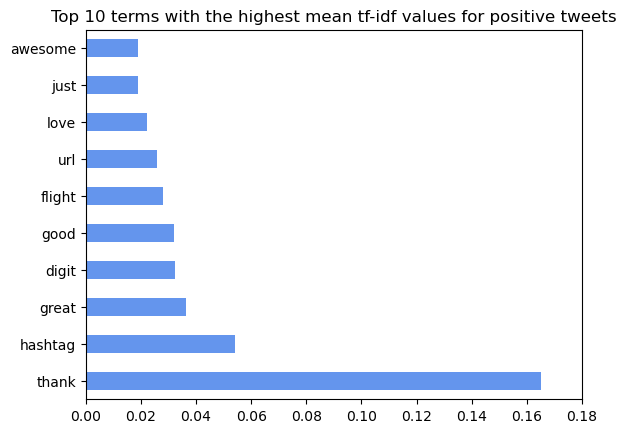

In [16]:
pos.plot(kind='barh', 
         xlim=(0, 0.18),
         color='cornflowerblue',
         title='Top 10 terms with the highest mean tf-idf values for positive tweets');

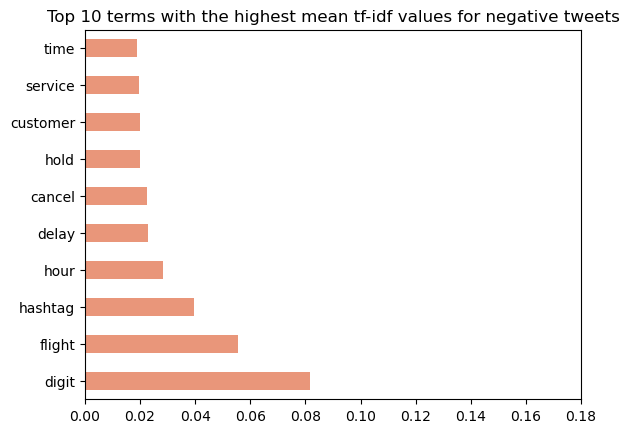

In [17]:
neg.plot(kind='barh', 
         xlim=(0, 0.18),
         color='darksalmon',
         title='Top 10 terms with the highest mean tf-idf values for negative tweets');

📌 Función TF-IDF.py

In [ ]:
# Importaciones necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Cargar dataset (ajusta la ruta si tu CSV no está en data/tweets.csv)
tweets = pd.read_csv("tweets.csv")

# 2. Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95)

# 3. Ajustar y transformar usando la columna 'text'
tf_dtm = vectorizer.fit_transform(tweets['text'].astype(str))

# 4. DataFrame de TF-IDF
tfidf = pd.DataFrame(tf_dtm.todense(),
                     columns=vectorizer.get_feature_names_out(),
                     index=tweets.index)

# ⚠️ Verifica que tengas la columna 'airline_sentiment'
if "airline_sentiment" not in tweets.columns:
    raise ValueError("❌ El dataset no contiene la columna 'airline_sentiment'")

# 5. Subconjuntos por sentimiento
positive_index = tweets[tweets['airline_sentiment'] == 'positive'].index
negative_index = tweets[tweets['airline_sentiment'] == 'negative'].index

# 6. Calcular medias TF-IDF y extraer top 10
pos = tfidf.loc[positive_index].mean().sort_values(ascending=False).head(10)
neg = tfidf.loc[negative_index].mean().sort_values(ascending=False).head(10)

# 7. Graficar resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

pos.sort_values().plot(kind='barh', ax=axes[0],
                       color='cornflowerblue',
                       title='Top 10 palabras (POSITIVE tweets)')

neg.sort_values().plot(kind='barh', ax=axes[1],
                       color='darksalmon',
                       title='Top 10 palabras (NEGATIVE tweets)')

plt.tight_layout()
plt.show()



**🔎 Explicación paso a paso**

Este código lee tweets, calcula el peso TF-IDF de las palabras, separa por sentimiento (positivo/negativo) y muestra las 10 palabras más características de cada grupo en forma de gráfico.

Implementa un análisis de TF-IDF (Term Frequency – Inverse Document Frequency) para identificar las palabras más representativas en tweets positivos y negativos de un dataset de aerolíneas.

Que es lo que hace:

1. Importación de librerías
    - pandas → para manejar el dataset en formato CSV.
    - matplotlib.pyplot → para graficar.
    - TfidfVectorizer (scikit-learn) → para calcular las ponderaciones TF-IDF de las palabras en los tweets.

2. Cargar el dataset
    - Lee el archivo tweets.csv y lo guarda en un DataFrame de Pandas.

3. Configurar y aplicar el vectorizador TF-IDF
    - Convierte los tweets a bolsa de palabras con pesos TF-IDF.
    - Elimina stopwords en inglés.
    - Solo incluye palabras que aparecen en al menos 2 documentos (min_df=2) y en como máximo 95% de los documentos (max_df=0.95).

    El resultado (tf_dtm) es una matriz donde las filas son tweets y las columnas son palabras, con valores de peso TF-IDF.

4. Convertir a DataFrame
    - Se transforma la matriz en un DataFrame para manipularla más fácilmente.

5. Filtrar tweets por sentimiento
    - Se crean dos listas de índices: uno con tweets positivos y otro con tweets negativos.

6. Calcular las palabras más representativas
    - Calcula el promedio de TF-IDF para cada palabra dentro de los tweets positivos y negativos.
    - Extrae las 10 palabras más importantes en cada grupo.

7. Graficar resultados
    - Se generan dos gráficos de barras horizontales, mostrando en paralelo:
    - Las palabras más frecuentes (según TF-IDF) en tweets positivos.
    - Las palabras más frecuentes (según TF-IDF) en tweets negativos.


✅ Salida esperada:

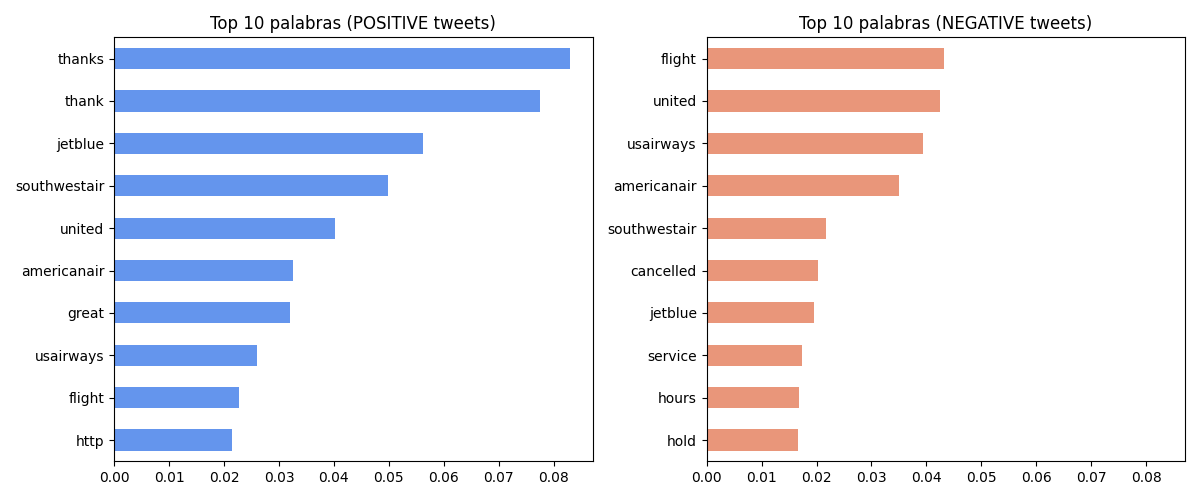